Binomial tests are useful for comparing the frequency of some outcome in a sample to the expected probability of that outcome. For example, if we expect 90% of ticketed passengers to show up for their flight but only 80 of 100 ticketed passengers actually show up, we could use a binomial test to understand whether 80 is significantly different from 90.

Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that:

- binomial tests are used for binary categorical data to compare a sample frequency to an expected population-level probability

- one-sample t-tests are used for quantitative data to compare a sample mean to an expected population mean.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom_test

We will walk through the process of using a binomial test to analyze data from a hypothetical online company, Live-it-LIVE.com — a website that sells all the necessary props and costumes to recreate iconic movie scenes at home!

In [2]:
monthly_report = pd.read_csv('../Datasets/monthly_report.csv')
print(monthly_report)

               timestamp purchase                       item
0    2020-01-17 17:23:06        y  cue cards - love actually
1    2020-01-25 17:09:39        n                        NaN
2    2020-01-25 05:22:01        n                        NaN
3    2020-01-18 04:33:40        y      t-rex - jurassic park
4    2020-01-24 17:24:52        n                        NaN
..                   ...      ...                        ...
495  2020-01-16 08:40:02        n                        NaN
496  2020-01-09 21:11:19        n                        NaN
497  2020-01-31 08:54:51        n                        NaN
498  2020-01-21 19:35:03        n                        NaN
499  2020-01-31 09:48:43        n                        NaN

[500 rows x 3 columns]


Note that the purchase column tells us whether a purchase was made; if so, the item that was purchased is listed in the item column. 

#### Summarizing the Sample
The marketing department at Live-it-LIVE reports that, during this time of year, about 10% of visitors to Live-it-LIVE.com make a purchase.

The monthly report shows every visitor to the site and whether or not they made a purchase. The checkout page had a small bug this month, so the business department wants to know whether the purchase rate dipped below expectation. They’ve asked us to investigate this question.

In order to run a hypothesis test to address this, we’ll first need to know two things from the data:

The number of people who visited the website
The number of people who made a purchase on the website
Assuming each row of our dataset represents a unique site visitor, we can calculate the number of people who visited the website by finding the number of rows in the data frame. We can then find the number who made a purchase by using a conditional statement to add up the total number of rows where a purchase was made.

For example, suppose that the dataset candy contains a column named chocolate with 'yes' recorded for every candy that has chocolate in it and 'no' otherwise. The following code calculates the sample size (the number of candies) and the number of those candies that contain chocolate:

sample size (number of rows): 
`samp_size = len(candy)`
 
number with chocolate: 
`total_with_chocolate = np.sum(candy.chocolate == 'yes')`

In [3]:
#calculate and print sample_size:
sample_size = len(monthly_report)
print(sample_size)

500


In [4]:
#calculate and print num_purchased:
num_purchased = np.sum(monthly_report['purchase'] == 'y')
print(num_purchased)

41


#### Simulating Randomness
In the cell above, we calculated that there were 500 site visitors to live-it-LIVE.com this month and 41 of them made a purchase. In comparison, if each of the 500 visitors had a 10% chance of making a purchase, we would expect around 50 of those visitors to buy something. Is 41 different enough from 50 that we should question whether this months’ site visitors really had a 10% chance of making a purchase?

To conceptualize why our expectation (50) and observation (41) might not be equal — EVEN IF there was no dip in the purchase probability — let’s turn to a common probability example: flipping a fair coin. We can simulate a coin flip in Python using the numpy.random.choice() function:

In [5]:
#An example
flip = np.random.choice(['heads', 'tails'], size=1, p=[0.5, 0.5])
print(flip) 

['tails']


If we run this code (or flip a real coin) a few times, we’ll find that — just like we can’t know ahead of time whether any single visitor to Live-it-LIVE.com will make a purchase — we can’t predict the outcome of any individual coin flip.

If we flip a fair coin 10 times in a row, we expect about 5 of those coins to come up heads (50%). We can simulate this in python by changing the size parameter of numpy.random.choice():

In [6]:
flip = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
print(flip)

['tails' 'tails' 'heads' 'heads' 'heads' 'heads' 'tails' 'tails' 'heads'
 'tails']


In [7]:
#simulate one visitor:
one_visitor = np.random.choice(['n', 'y'], p = [0.9 , 0.1], size = 1)
print(one_visitor)

['n']


In [8]:
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(['n', 'y'], p = [0.9, 0.1], size = 500)
print(simulated_monthly_visitors)

['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'y' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n

#### Simulating the Null Distribution I
The first step in running a hypothesis test is to form a null hypothesis. For the question of whether the purchase rate at Live-it-LIVE.com was different from 10% this month, the null hypothesis describes a world in which the true probability of a visitor making a purchase was exactly 10%, but by random chance, we observed that only 41 visitors (8.2%) made a purchase.

Let’s return to the coin flip example from the previous exercise. We can simulate 10 coin flips and print out the number of those flips that came up heads using the following code:

In [9]:
flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
num_heads = np.sum(flips == 'heads')
print(num_heads)

4


If we run this code a few times, we’ll likely see different results each time. This will give us get a sense for the range in the number of heads that could occur by random chance, even if the coin is fair. We’re more likely to see numbers like four, five, or six, but maybe we’ll see something more extreme every once in a while — ten heads in a row, or even zero!

In [10]:
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

#calculate the number of simulated visitors who made a purchase:
num_purchased = np.sum(simulated_monthly_visitors == 'y')
print(num_purchased)

47


#### Simulating the Null Distribution II
In the last cell, we simulated a random sample of 500 visitors, where each visitor had a 10% chance of making a purchase. When we pressed “Run” a few times, we saw that the number of purchases varied from sample to sample, but was around 50.

Similarly, we simulated a single random sample of 10 coin flips, where each flip had a 50% chance of coming up heads. We saw that the number of simulated heads was not necessarily 5, but somewhere around 5.

By running the same simulated experiment many times, we can get a sense for how much a particular outcome (like the number of purchases, or heads) varies by random chance. Consider the following code:

In [11]:
outcomes = []
for i in range(10000): 
    flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    outcomes.append(num_heads)
#print(outcomes)

In this code chunk, we’ve done the following:

- initialized an empty list named outcomes to store the number of ‘heads’ from simulated samples of coin flips
- set up a for-loop to repeat the steps below 10000 times:

  -flip a fair coin 10 times
  
  -calculate the number of those 10 flips that came up heads
  
  -append that number onto outcomes
  
Note that 10000 is an arbitrarily chosen large number — it’s big enough that it will yield almost all possible outcomes of our experiment, and small enough that the simulation still runs quickly. From inspecting the output, we can see that the number of ‘heads’ varied between 0 and 10:

In [12]:
min_heads = np.min(outcomes) 
print(min_heads) 
 
max_heads = np.max(outcomes)
print(max_heads) 

0
10


Thus, if we flip a fair coin 10 times, we could observe anywhere between 0 and 10 heads by random chance.

In [13]:
null_outcomes = []

#start for loop here:
for i in range(10000):
  simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
  num_purchased = np.sum(simulated_monthly_visitors == 'y')
  null_outcomes.append(num_purchased)


#calculate the minimum and maximum values in null_outcomes here:
null_min = np.min(null_outcomes)
null_max = np.max(null_outcomes)
print(null_min)
print(null_max)


25
75


#### Inspecting the Null Distribution
In the previous cell, we simulated 10000 different samples of 500 visitors, where each visitor had a 10% chance of making a purchase, and calculated the number of purchases per sample. Upon further inspection, we saw that those numbers ranged from around 25 to 75. This is useful information, but we can learn even more from inspecting the full distribution.

For example, recall our 10000 coin flip experiments: for each experiment, we flipped a fair coin 10 times and recorded the number of heads in a list named outcomes. We can plot a histogram of outcomes using matplotlib.pyplot.hist(). We can also add a vertical line at any x-value using matplotlib.pyplot.axvline():

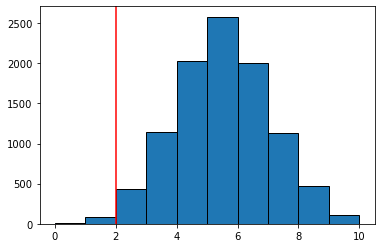

In [14]:
plt.hist(outcomes, edgecolor = 'black')
plt.axvline(2, color = 'r')
plt.show()

This histogram shows us that, over 10000 experiments, we observed as few as 0 and as many as 10 heads out of 10 flips. However, we were most likely to observe around 4-6 heads. It would be unlikely to observe only 2 heads (where the vertical red line is)

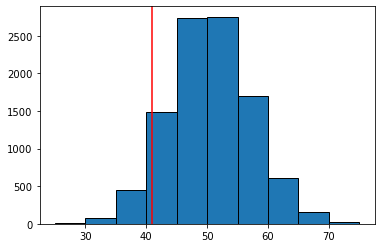

In [15]:
#plotting the histogram of the null outcomes:
plt.hist(null_outcomes, edgecolor = 'black')

plt.axvline(41, color = 'red')
plt.show()

41 purchases is somewhat likely to occur based on this null distribution. It’s not in the middle of the distribution, where there’s the most density, but it’s also not way out in the tails (which would mean it is very unlikely).

#### Confidence Intervals
So far, we’ve inspected the null distribution and calculated the minimum and maximum values. While the number of purchases in each simulated sample ranged roughly from 25 to 75 by random chance, upon further inspection of the distribution, we saw that those extreme values happened very rarely.

By reporting an interval covering 95% of the values instead of the full range, we can say something like: “we are 95% confident that, if each visitor has a 10% chance of making a purchase, a random sample of 500 visitors will make between 37 and 63 purchases.” We can use the np.percentile() function to calculate this 95% interval as follows:

In [16]:
np.percentile(null_outcomes, [2.5,97.5])

array([37., 63.])

We calculated the 2.5th and 97.5th percentiles so that exactly 5% of the data falls outside those percentiles (2.5% above the 97.5th percentile, and 2.5% below the 2.5th percentile). This leaves us with a range covering 95% of the data.

If our observed statistic falls outside this interval, then we can conclude it is unlikely that the null hypothesis is true. In this example, because 41 falls within the 95% interval (37 - 63), it is still reasonably likely that we observed a lower purchase rate by random chance, even though the null hypothesis was true.

In [17]:
#calculate the 90% interval here:
null_90CI = np.percentile(null_outcomes, [5, 95])
print(null_90CI)

[39. 61.]


#### Calculating a One-Sided P-Value
P-value calculations and interpretations depend on the alternative hypothesis of a test, a description of the difference from expectation that we are interested in.

For example, let’s return to the 10-coin-flip example from earlier. Suppose that we flipped a coin 10 times and observed only 2 heads. We might run a hypothesis test with the following null and alternative hypotheses:

- Null: the probability of heads is 0.5
- Alternative: the probability of heads is less than 0.5

This hypothesis test asks the question: IF the probability of heads is 0.5, what’s the probability of observing 2 or fewer heads among a single sample of 10 coin flips?

Earlier, we used a for-loop to repeatedly (10000 times!) flip a fair coin 10 times, and store the number of heads (for each set of 10 flips) in a list named outcomes. The probability of observing 2 or fewer heads among 10 coin flips is approximately equal to the proportion of those 10000 experiments where we observed 0, 1, or 2 heads:

In [18]:
outcomes = np.array(outcomes)
p_value = np.sum(outcomes <= 2)/len(outcomes) 
print(p_value)

0.0533


We estimated that the probability of observing 2 or fewer heads is about 0.059 (5.9%). This probability (0.059) is referred to as a one-sided p-value.

In [19]:
#calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41)/len(null_outcomes)
print(p_value)

0.0994


#### Calculating a Two-Sided P-Value
In the previous cell, we calculated a one-sided p-value. In this exercise, we’ll estimate a p-value for a 2-sided test, which is the default setting for many functions in Python (and other languages, like R!).

In our 10-coin-flip experiment, remember that we observed 2 heads, which is 3 less than the expected value of 5 (50% of 10) if the null hypothesis is true. The two sided test focuses on the number of heads being three different from expectation, rather than just less than. The hypothesis test now asks the following question:

Suppose that the true probability of heads is 50%. What is the probability of observing either two or fewer heads OR eight or more heads? (Note that two and eight are both three away from five). 

This proportion can be calculated in Python as follows. Note that the `|` symbol is similar to `'or'`, but works for comparing multiple values at once.

In [20]:
outcomes = np.array(outcomes)
p_value = np.sum((outcomes <= 2) | (outcomes >= 8))/len(outcomes)
print(p_value)

0.1111


Use null_outcomes to calculate the p-value for a two-sided test (alternative hypothesis is that the purchase probability was DIFFERENT FROM 10%). Remember that, if the purchase rate is 10%, we expect 50 of the 500 visitors to make a purchase.

In other words, calculate the proportion of values in null_outcomes that are less than or equal to 41 (the number of purchases we observed in our sample, which is 9 fewer than 50) OR greater than or equal to 59 (which is 9 purchases more than 50). Save this number as a variable named p_value and print it out.

In [21]:
#calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59))/len(null_outcomes)
print(p_value)

0.2017


#### Writing a Binomial Test Function
So far, we’ve conducted a simulated binomial hypothesis test for Live-it-LIVE.com. In this exercise, we’ll use our code from the previous exercises to write our own binomial test function. Our function will use simulation, so it will estimate (albeit fairly accurately) the same p-values we would get using much more complex mathematical equations.

A function has been outlined for you in script.py which contains the code that we used for Live_it_LIVE inside a function named simulation_binomial_test(). Your goal in the next few exercises will be to edit this function so that it takes in any values for the following:

- The observed sample statistic (eg., 41 purchases)
- The sample size (eg., 500 visitors)
- The null probability of success (eg., 0.10 probability of a purchase)

The function should return a p-value for a one-sided test where the alternative hypothesis is that the true probability of success is LESS THAN the null.

In [22]:
def simulation_binomial_test(observed_successes, n, p):
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes)/n 
  
  #return the p-value
  return p_value

In [23]:
p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

simulation p-value:  5.166


In [24]:
p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

binom_test p-value:  0.25468926056232155


#### Binomial Testing with SciPy
More formally, the binomial distribution describes the number of expected “successes” in an experiment with some number of “trials”. In the example you just worked through, the experiment consisted of 500 people visiting Live-it-LIVE.com. For each of those trials (visitors), we expected a 10% chance of a purchase (success), but observed only 41 successes (less than 10%).

SciPy has a function called binom_test(), which performs a binomial test for you. The default alternative hypothesis for the binom_test() function is two-sided, but this can be changed using the alternative parameter (eg., alternative = 'less' will run a one-sided lower tail test).

binom_test() requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success. For example, with 10 flips of a fair coin (trials), the expected probability of heads is 0.5. Let’s imagine we get 2 heads (observed successes) in 10 flips. Is the coin weighted? The function call for this binomial test would look like:

In [25]:
p_value = binom_test(2, n=10, p=0.5)
print(p_value)

0.10937500000000003


This tells us that IF the true probability of heads is 0.5, the probability of observing 2 or fewer heads OR 8 or more heads is 0.109 (10.9%).

In [26]:
# calculate p_value_2sided here:
p_value_2sided = binom_test(41, n = 500, p = 0.10)
print(p_value_2sided)
# calculate p_value_1sided here:
p_value_1sided = binom_test(41, n = 500, p = 0.10, alternative = 'less')
print(p_value_1sided)

0.20456397700678308
0.1001135269756488


To summarize, here are some of the things you’ve learned about hypothesis tests in general:

- All hypothesis tests start with a null and alternative hypothesis

- Outcomes of a hypothesis test that might be reported include:

  -confidence intervals
  
  -p-values
  
  
- A hypothesis test can be simulated by:

  -taking repeated random samples where the null hypothesis is assumed to be true
  
  -using those simulated samples to generate a null distribution
  
  -comparing an observed sample statistic to that null distribution

In [27]:
def simulation_binomial_test(observed_successes, n, p, alternative_hypothesis):
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  null_outcomes = np.array(null_outcomes)

  if alternative_hypothesis == 'less':
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  elif alternative_hypothesis == 'greater':
    p_value = np.sum(null_outcomes >= observed_successes)/len(null_outcomes)
  else:
    difference = np.abs(p*n - observed_successes)
    upper = p*n + difference
    lower = p*n - difference
    p_value = np.sum((null_outcomes >= upper) | (null_outcomes <= lower))/len(null_outcomes)
  
  #return the p-value
  return p_value

#Test your function:
print('lower tail one-sided test:')
p_value1 = simulation_binomial_test(45, 500, .1, alternative_hypothesis = 'less')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

print('upper tail one-sided test:')
p_value1 = simulation_binomial_test(53, 500, .1, alternative_hypothesis = 'greater')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(53, 500, .1, alternative = 'greater')
print("binom_test p-value: ", p_value2)

print('two-sided test:')
p_value1 = simulation_binomial_test(42, 500, .1, alternative_hypothesis = 'not_equal')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(42, 500, .1)
print("binom_test p-value: ", p_value2)

lower tail one-sided test:
simulation p-value:  0.2611
binom_test p-value:  0.25468926056232155
upper tail one-sided test:
simulation p-value:  0.3514
binom_test p-value:  0.3483811994999115
two-sided test:
simulation p-value:  0.2621
binom_test p-value:  0.26313834687316334


#### Introduction to Significance Thresholds
Sometimes, when we run a hypothesis test, we simply report a p-value or a confidence interval and give an interpretation (eg., the p-value was 0.05, which means that there is a 5% chance of observing two or fewer heads in 10 coin flips).

In other situations, we want to use our p-value to make a decision or answer a yes/no question. For example, suppose that we’re developing a new quiz question at Codecademy and want learners to have a 70% chance of getting the question right (higher would mean the question is too easy, lower would mean the question is too hard). We show our quiz question to a sample of 100 learners and 60 of them get it right. Is this significantly different from our target of 70%? If so, we want to remove the question and try to rewrite it.

In order to turn a p-value, which is a probability, into a yes or no answer, data scientists often use a pre-set significance threshold. The significance threshold can be any number between 0 and 1, but a common choice is 0.05. P-values that are less than this threshold are considered “significant”, while larger p-values are considered “not significant”.

#### Interpreting a P-Value based on a Significance Threshold
Let’s return to the quiz question example from the previous exercise — we want to remove our quiz question from our website if the probability of a correct response is different from 70%. Suppose we collected data from 100 learners and ran a binomial hypothesis test with the following null and alternative hypotheses:

- Null: The probability that a learner gets the question correct is 70%.
- Alternative: The probability that a learner gets the question correct is not 70%.

Assuming that we set a significance threshold of 0.05 for this test:

- If the p-value is less than 0.05, the p-value is significant. We will “reject the null hypothesis” and conclude that the probability of a correct answer is significantly different from 70%. This would lead us to re-rewrite the question.

- If the p-value is greater than 0.05, the p-value is not significant. We will not be able to reject the null hypothesis, and will conclude that the probability of a correct answer is not significantly different from 70%. This would lead us to leave the question on the site.


#### Error Types
Whenever we run a hypothesis test using a significance threshold, we expose ourselves to making two different kinds of mistakes: type I errors (false positives) and type II errors (false negatives):

<img src = 'pic.png'>

Consider the quiz question hypothesis test described in the previous exercises:

- Null: The probability that a learner answers a question correctly is 70%.
- Alternative: The probability that a learner answers a question correctly is not 70%.

Suppose, for a moment, that the true probability of a learner answering the question correctly is 70% (if we showed the question to ALL learners, exactly 70% would answer it correctly). This puts us in the first column of the table above (the null hypothesis “is true”). If we run a test and calculate a significant p-value, we will make type I error (also called a false positive because the p-value is falsely significant), leading us to remove the question when we don’t need to.

On the other hand, if the true probability of getting the question correct is not 70%, the null hypothesis “is false” (the right-most column of our table). If we run a test and calculate a non-significant p-value, we make a type II error, leading us to leave the question on our site when we should have taken it down.

Suppose that the average score on a standardized test is 50 points. A researcher wants to know whether students who take this test in an ergonomically designed chair score significantly differently from the general population of test-takers. The researcher randomly assigns 100 students to take the test in an ergonomic chair. Then, the researcher runs a hypothesis test with a significance threshold of 0.05 and the following null and alternative hypotheses:

- Null: The mean score for students who take the test in an ergonomic chair is 50 points.
- Alternative: The mean score for students who take the test in an ergonomic chair is not 50 points.

Suppose that the truth (which the researcher doesn’t know) is: if every student took the test in an ergonomic chair, the average score for all test-takers would be 52 points.

Based on their sample of only 100 students, the researcher calculates a p-value of 0.07. 
Will the researcher make a:

- 'correct' if the researcher will come to the correct conclusion based on this test
- 'type one' if the researcher will make a type I error based on this test
- 'type two' if the researcher will make a type II error based on this test



Note that the true average score for students who take the test in an ergonomic chair is 52 points. The null hypothesis for our test is that the average score is 50 points. Therefore, the researcher is running a hypothesis test where the null hypothesis is false. A p-value of 0.07 is greater than the significance threshold, and would lead the researcher to conclude (incorrectly) that the average score for students in an ergonomic chair is not significantly different from 50 points.

#### Setting the Type I Error Rate
It turns out that, when we run a hypothesis test with a significance threshold, the significance threshold is equal to the type I error (false positive) rate for the test. To see this, we can use a simulation.

Recall our quiz question example: the null hypothesis is that the probability of getting a quiz question correct is equal to 70%. We’ll make a type I error if the null hypothesis is correct (the true probability of a correct answer is 70%), but we get a significant p-value anyways.



In [30]:
false_positives = 0
sig_threshold = 0.05
 
for i in range(1000):
    sim_sample = np.random.choice(['correct', 'incorrect'], size=100, p=[0.7, 0.3])
    num_correct = np.sum(sim_sample == 'correct')
    p_val = binom_test(num_correct, 100, 0.7)
    if p_val < sig_threshold:
        false_positives += 1
 
print(false_positives/1000)
print(false_positives)

0.05
50


This code does the following:

- Set the significance threshold equal to 0.05 and a counter for false positives equal to zero.
- Repeat these steps 1000 times:
 - Simulate 100 learners, where each learner has a 70% chance of answering a quiz question correctly.
 - Calculate the number of simulated learners who answered the question correctly. Note that, because each learner has a 70% chance of answering correctly, this number will likely be around 70, but will vary every time by random chance.
 - Run a binomial test for the simulated sample where the null hypothesis is that the probability of a correct answer is 70% (0.7). Note that, every time we run this test, the null hypothesis is true because we simulated our data so that the probability of a correct answer is 70%.
 - Add 1 to our false positives counter every time we make a type I error (the p-value is significant).
- Print the proportion of our 1000 tests (on simulated samples) that resulted in a false positive.
Note that the proportion of false positive tests is very similar to the value of the significance threshold (0.05)

The code from the narrative has been provided for you in script.py with one small change: the code to create sim_sample has been altered so that the simulated learners each have an 80% chance of answering the question correctly. Change the call to binom_test() so that, for each simulated dataset, you’re running a binomial test where the null hypothesis is true. Press “Run”.

If you’ve done this correctly, you should see that the proportion of tests resulting in a false positive is close to the significance threshold (0.05).

In [32]:
# Initialize num_errors
false_positives = 0
# Set significance threshold value
sig_threshold = 0.05

# Run binomial tests & record errors
for i in range(1000):
    sim_sample = np.random.choice(['correct', 'incorrect'], size=100, p=[0.8, 0.2])
    num_correct = np.sum(sim_sample == 'correct')
    p_val = binom_test(num_correct, 100, .8)
    if p_val < sig_threshold:
        false_positives += 1

# Print proportion of type I errors 
print(false_positives/1000)

0.049


Now, change the significance threshold to 0.01 and press “Run”.

Note that the proportion of simulations that result in a type I error should now be close to 0.01.

In [33]:
# Initialize num_errors
false_positives = 0
# Set significance threshold value
sig_threshold = 0.01

# Run binomial tests & record errors
for i in range(1000):
    sim_sample = np.random.choice(['correct', 'incorrect'], size=100, p=[0.8, 0.2])
    num_correct = np.sum(sim_sample == 'correct')
    p_val = binom_test(num_correct, 100, .8)
    if p_val < sig_threshold:
        false_positives += 1

# Print proportion of type I errors 
print(false_positives/1000)

0.013


#### Problems with Multiple Hypothesis Tests
While significance thresholds allow a data scientist to control the false positive rate for a single hypothesis test, this starts to break when performing multiple tests as part of a single study.

For example, suppose that we are writing a quiz at codecademy that is going to include 10 questions. For each question, we want to know whether the probability of a learner answering the question correctly is different from 70%. We now have to run 10 hypothesis tests, one for each question.

If the null hypothesis is true for every hypothesis test (the probability of a correct answer is 70% for every question) and we use a .05 significance level for each test, then:
- When we run a hypothesis test for a single question, we have a 95% chance of getting the right answer (a p-value > 0.05) — and a 5% chance of making a type I error.
- When we run hypothesis tests for two questions, we have only a 90% chance of getting the right answer for both hypothesis tests (.95*.95 = 0.90) — and a 10% chance of making at least one type I error.
- When we run hypothesis tests for all 10 questions, we have a 60% chance of getting the right answer for all ten hypothesis tests (0.95^10 = 0.60) — and a 40% chance of making at least one type I error.
To address this problem, it is important to plan research out ahead of time: decide what questions you want to address and figure out how many hypothesis tests you need to run. When running multiple tests, use a lower significance threshold (eg., 0.01) for each test to reduce the probability of making a type I error.

A graph that shows the probability of making at least one type I error among some number of tests with a significance threshold of 0.05.

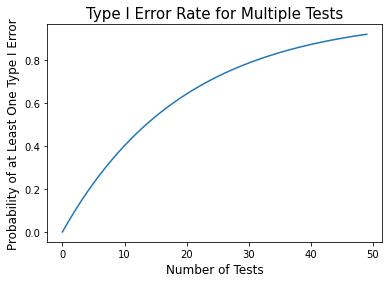

In [34]:
# Create the plot
sig_threshold = 0.05
num_tests = np.array(range(50))
probabilities = 1-((1-sig_threshold)**num_tests)
plt.plot(num_tests, probabilities)

# Edit title and axis labels
plt.title('Type I Error Rate for Multiple Tests', fontsize=15)
# Label the y-axis
plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
# Label the x-axis
plt.xlabel('Number of Tests', fontsize=12)

# Show the plot                
plt.show()

Approximately how many tests would we have to run at a 0.05 significance level so that the probability of at least one type I error would be 50%. 

Change the code to create the plot so that it shows the probability of at least one type I error for multiple tests with a significance threshold of 0.10 (instead of 0.05).

Inspect your new plot. Now how many tests would lead to a probability of a type I error of 50%?

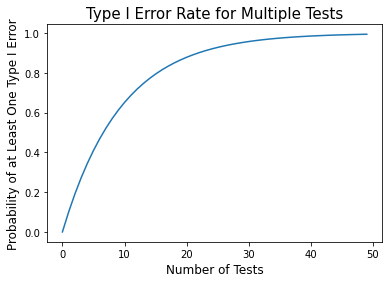

In [35]:
# Create the plot
sig_threshold = 0.10
num_tests = np.array(range(50))
probabilities = 1-((1-sig_threshold)**num_tests)
plt.plot(num_tests, probabilities)

# Edit title and axis labels
plt.title('Type I Error Rate for Multiple Tests', fontsize=15)
# Label the y-axis
plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
# Label the x-axis
plt.xlabel('Number of Tests', fontsize=12)

# Show the plot                
plt.show()

Suppose we are running a hypothesis test with the following null and alternative hypotheses: Null hypothesis: 10% of subscribers will read an article Alternative hypothesis: More than 10% of subscribers will read an article

Out of a sample of 100 subscribers who saw an article, 15 people read it. Based on this sample, suppose we run a binomial hypothesis test and calculate a p-value of 0.04. Fill in the blanks to indicate the correct interpretation of this p-value:

If each subscriber has a  10%  chance of reading the article, then there is a  4%  chance that, among a random sample of  100  subscribers,  15  or more will read the article.

Suppose we are running a hypothesis test with the following null and alternative hypotheses:

Null hypothesis: 50% of visitors to a website will click at least one link on the page
Alternative hypothesis: Less than 50% of visitors to a website will click at least one link on the page.
We record data for a random sample of 100 website visitors and find that 48 of them click at least one link. Fill in the blanks to indicate how to we could simulate a null distribution for this hypothesis test:


Repeat the following process a large number of times: Simulate a sample of   500  visitors, where each visitor has a  50%  chance of clicking a link. For each sample, calculate the number of visitors who clicked. Finally, create a  histogram  of the numbers of clicks among the simulated samples.